In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
from keras.datasets import cifar10
from keras import backend as K
import matplotlib.pyplot as plt
from keras.models import load_model
import random

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [16]:
model = load_model('keras_cifar10_trained_model.h5')
result = model.predict_classes(x_test[0].reshape(1,32,32,3))
print(result)
print(y_test[0])
print(model.predict(x_test[0].reshape(1,32,32,3)))
print('x_train shape:', x_train.shape)

[5]
[3]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
x_train shape: (50000, 32, 32, 3)


[8]
[1]


array([161, 180, 190], dtype=uint8)

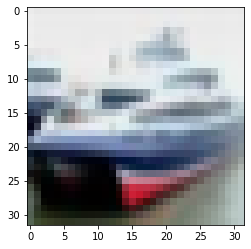

In [15]:
plt.imshow(x_test[1])
print(y_test[1])
result = model.predict_classes(x_test[1].reshape(1,32,32,3))
print(result)
x_test[1,6,17]

In [12]:
import copy
x_test_tmp = copy.deepcopy(x_test)
len(x_test)

10000

In [13]:
count = 0 
for index in range(10):  # 使用测试集的10张图片进行遍历攻击
    result = model.predict_classes(x_test[index].reshape(1,32,32,3))
    if result != y_test[index]:  # 剔除模型分类出错的图片
        count += 1
        continue
    else:
        for i in range(32):
            for j in range(32):
                    x_test_tmp[index,i,j] = [255,255,255]
                    result = model.predict_classes(x_test_tmp[index].reshape(1,32,32,3))
                    res = model.predict(x_test_tmp[index].reshape(1,32,32,3))
                    if result[0] != y_test[index]:
                        print("predict:",res[0])
                        print("predict:",result[0])
                        print("true:",y_test[index])
                        print((index,i,j))
                    x_test_tmp = copy.deepcopy(x_test)
print(count)

predict: [8.5364383e-01 0.0000000e+00 1.4681008e-20 1.1060793e-09 0.0000000e+00
 0.0000000e+00 1.4633122e-01 2.4956762e-05 0.0000000e+00 1.1888513e-25]
predict: 0
true: [6]
(7, 0, 22)
predict: [1.0000000e+00 0.0000000e+00 1.8679380e-24 3.0769137e-17 0.0000000e+00
 0.0000000e+00 1.2259434e-11 4.9475021e-11 0.0000000e+00 8.3050416e-31]
predict: 0
true: [6]
(7, 0, 24)
predict: [9.9999976e-01 0.0000000e+00 9.0232995e-22 4.0586212e-17 0.0000000e+00
 0.0000000e+00 2.9548798e-07 2.3685465e-10 0.0000000e+00 3.3852198e-27]
predict: 0
true: [6]
(7, 0, 25)
predict: [1.0000000e+00 0.0000000e+00 1.2075454e-25 7.7924043e-24 0.0000000e+00
 0.0000000e+00 1.2933750e-16 1.2883984e-13 0.0000000e+00 4.9303445e-31]
predict: 0
true: [6]
(7, 0, 26)
predict: [1.0000000e+00 0.0000000e+00 4.9744631e-21 1.6511465e-20 0.0000000e+00
 0.0000000e+00 3.8862641e-08 1.3475408e-10 0.0000000e+00 6.4708488e-27]
predict: 0
true: [6]
(7, 0, 27)
predict: [1.0000000e+00 0.0000000e+00 1.3933966e-24 3.0295580e-24 0.0000000e+00


predict: [1.0000000e+00 0.0000000e+00 6.6690130e-31 4.1207176e-22 0.0000000e+00
 0.0000000e+00 6.5846604e-30 8.7708729e-15 0.0000000e+00 0.0000000e+00]
predict: 0
true: [6]
(7, 3, 26)
predict: [1.0000000e+00 0.0000000e+00 0.0000000e+00 9.3648745e-36 0.0000000e+00
 0.0000000e+00 0.0000000e+00 9.9119724e-22 0.0000000e+00 0.0000000e+00]
predict: 0
true: [6]
(7, 3, 27)
predict: [1.0000000e+00 0.0000000e+00 1.6326387e-35 1.6870364e-35 0.0000000e+00
 0.0000000e+00 1.1428230e-33 3.0181973e-23 0.0000000e+00 1.8719622e-38]
predict: 0
true: [6]
(7, 3, 28)
predict: [1.0000000e+00 0.0000000e+00 1.9608952e-37 1.1489539e-36 0.0000000e+00
 0.0000000e+00 2.0643526e-35 1.7776436e-19 0.0000000e+00 0.0000000e+00]
predict: 0
true: [6]
(7, 3, 29)
predict: [1.0000000e+00 0.0000000e+00 3.3594225e-30 4.1041349e-30 0.0000000e+00
 0.0000000e+00 3.1817838e-19 8.9562127e-17 0.0000000e+00 4.2783176e-30]
predict: 0
true: [6]
(7, 3, 30)
predict: [9.9896073e-01 0.0000000e+00 2.8853939e-19 1.2758265e-20 0.0000000e+00


predict: [1.0000000e+00 0.0000000e+00 1.4745013e-32 1.1846593e-25 0.0000000e+00
 0.0000000e+00 4.7779951e-17 7.3557954e-20 0.0000000e+00 2.2064292e-35]
predict: 0
true: [6]
(7, 6, 23)
predict: [1.0000000e+00 0.0000000e+00 4.7587634e-34 1.9861300e-37 0.0000000e+00
 0.0000000e+00 8.1091097e-28 4.6320883e-24 0.0000000e+00 0.0000000e+00]
predict: 0
true: [6]
(7, 6, 24)
predict: [1.0000000e+00 0.0000000e+00 6.7667531e-38 3.5943440e-38 0.0000000e+00
 0.0000000e+00 7.6283729e-32 2.2974079e-26 0.0000000e+00 3.3506948e-37]
predict: 0
true: [6]
(7, 6, 25)
predict: [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 2.2118534e-30 0.0000000e+00 0.0000000e+00]
predict: 0
true: [6]
(7, 6, 26)
predict: [1.0000000e+00 0.0000000e+00 1.3594940e-32 3.8167787e-34 0.0000000e+00
 0.0000000e+00 3.7032533e-30 1.1167941e-15 0.0000000e+00 0.0000000e+00]
predict: 0
true: [6]
(7, 6, 27)
predict: [1.0000000e+00 0.0000000e+00 1.4286485e-35 0.0000000e+00 0.0000000e+00


predict: [1.61221002e-11 0.00000000e+00 2.71417112e-13 1.31432475e-30
 0.00000000e+00 4.00744277e-37 0.00000000e+00 1.00000000e+00
 0.00000000e+00 0.00000000e+00]
predict: 7
true: [6]
(7, 9, 8)
predict: [0.0000000e+00 0.0000000e+00 3.4530928e-13 8.2491480e-10 0.0000000e+00
 1.7488514e-09 2.0750523e-11 1.0000000e+00 0.0000000e+00 0.0000000e+00]
predict: 7
true: [6]
(7, 9, 9)
predict: [9.5025510e-01 0.0000000e+00 1.2672804e-17 2.4537542e-20 0.0000000e+00
 5.0460517e-32 3.0082924e-07 4.9744572e-02 0.0000000e+00 4.4003336e-34]
predict: 0
true: [6]
(7, 9, 16)
predict: [8.8715555e-05 0.0000000e+00 9.4438714e-19 9.9985871e-22 0.0000000e+00
 4.8279871e-26 3.3895076e-12 9.9991131e-01 0.0000000e+00 4.1308533e-35]
predict: 7
true: [6]
(7, 9, 17)
predict: [1.0000000e+00 0.0000000e+00 4.9261859e-25 8.3979016e-25 0.0000000e+00
 0.0000000e+00 2.5622438e-08 1.0177706e-11 0.0000000e+00 0.0000000e+00]
predict: 0
true: [6]
(7, 9, 18)
predict: [1.0000000e+00 0.0000000e+00 2.0005699e-22 2.0854827e-23 0.000

predict: [1.0000000e+00 0.0000000e+00 1.6614952e-36 1.6291210e-38 0.0000000e+00
 0.0000000e+00 4.2413837e-29 5.6218036e-18 0.0000000e+00 0.0000000e+00]
predict: 0
true: [6]
(7, 11, 22)
predict: [1.0000000e+00 0.0000000e+00 4.3663229e-18 2.0658266e-34 0.0000000e+00
 0.0000000e+00 7.9400835e-12 4.6194419e-14 0.0000000e+00 0.0000000e+00]
predict: 0
true: [6]
(7, 11, 23)
predict: [1.0000000e+00 0.0000000e+00 1.4825438e-25 1.1275604e-37 0.0000000e+00
 0.0000000e+00 3.0104603e-22 1.9519439e-10 0.0000000e+00 0.0000000e+00]
predict: 0
true: [6]
(7, 11, 24)
predict: [1.0000000e+00 0.0000000e+00 4.4875639e-27 8.7543375e-35 6.6330379e-38
 0.0000000e+00 1.8678216e-19 1.2390851e-10 0.0000000e+00 0.0000000e+00]
predict: 0
true: [6]
(7, 11, 25)
predict: [9.9999881e-01 0.0000000e+00 3.8696002e-24 1.3671388e-30 7.1021001e-38
 0.0000000e+00 5.4525569e-17 1.2165485e-06 0.0000000e+00 0.0000000e+00]
predict: 0
true: [6]
(7, 11, 26)
predict: [5.6011365e-03 0.0000000e+00 5.3986588e-17 1.2317422e-22 1.7608588

predict: [9.9999988e-01 0.0000000e+00 9.2949314e-30 1.2855900e-13 0.0000000e+00
 0.0000000e+00 2.1594512e-10 7.6019724e-08 1.8483706e-28 2.4671310e-17]
predict: 0
true: [6]
(7, 14, 16)
predict: [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.9360274e-35 0.0000000e+00
 0.0000000e+00 5.9345394e-13 4.8328539e-27 0.0000000e+00 4.2270267e-28]
predict: 0
true: [6]
(7, 14, 17)
predict: [1.0000000e+00 0.0000000e+00 0.0000000e+00 8.5412307e-30 0.0000000e+00
 0.0000000e+00 1.3149975e-14 5.1553733e-26 0.0000000e+00 1.0691582e-30]
predict: 0
true: [6]
(7, 14, 18)
predict: [1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 9.383159e-26 0.000000e+00 0.000000e+00 0.000000e+00]
predict: 0
true: [6]
(7, 14, 19)
predict: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
predict: 0
true: [6]
(7, 14, 20)
predict: [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 1.3950975e-33 0.0000000e+00 0.0000000e+00 0.0000000e+00]
predict: 0
true: [6]
(7, 14, 21)
predict: [1

predict: [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 3.6374371e-29 5.1492817e-33 0.0000000e+00 0.0000000e+00]
predict: 0
true: [6]
(7, 16, 22)
predict: [1.0000000e+00 0.0000000e+00 0.0000000e+00 7.4967199e-37 0.0000000e+00
 0.0000000e+00 8.0986482e-16 9.5451924e-17 0.0000000e+00 0.0000000e+00]
predict: 0
true: [6]
(7, 16, 24)
predict: [1.0000000e+00 0.0000000e+00 6.5215087e-32 0.0000000e+00 0.0000000e+00
 0.0000000e+00 2.2843605e-11 1.3368723e-15 0.0000000e+00 0.0000000e+00]
predict: 0
true: [6]
(7, 16, 25)
predict: [9.9977368e-01 0.0000000e+00 1.5089306e-25 6.0113555e-30 0.0000000e+00
 0.0000000e+00 3.9034108e-05 1.8727565e-04 0.0000000e+00 0.0000000e+00]
predict: 0
true: [6]
(7, 16, 26)
predict: [1.0000000e+00 0.0000000e+00 5.6633919e-32 1.9238104e-31 0.0000000e+00
 0.0000000e+00 6.9182681e-16 3.0701628e-08 0.0000000e+00 0.0000000e+00]
predict: 0
true: [6]
(7, 16, 28)
predict: [9.9997699e-01 0.0000000e+00 4.4125901e-24 1.0820815e-25 0.0000000

predict: [9.9980325e-01 0.0000000e+00 5.4269091e-30 7.0179211e-26 0.0000000e+00
 0.0000000e+00 1.9679079e-04 2.8482253e-10 0.0000000e+00 9.5721129e-33]
predict: 0
true: [6]
(7, 19, 23)
predict: [9.99880314e-01 0.00000000e+00 8.04969069e-32 5.00142024e-35
 0.00000000e+00 0.00000000e+00 1.19717246e-04 1.71070453e-16
 0.00000000e+00 0.00000000e+00]
predict: 0
true: [6]
(7, 19, 24)
predict: [9.1590071e-01 0.0000000e+00 2.3802969e-26 3.0037176e-23 0.0000000e+00
 0.0000000e+00 8.4099367e-02 3.3158434e-09 0.0000000e+00 3.9104814e-37]
predict: 0
true: [6]
(7, 19, 29)
predict: [8.2769763e-01 0.0000000e+00 9.8236670e-26 7.7350366e-29 0.0000000e+00
 0.0000000e+00 1.7230238e-01 7.1570920e-23 0.0000000e+00 9.5581315e-36]
predict: 0
true: [6]
(7, 19, 30)
predict: [9.2906523e-01 0.0000000e+00 5.2114856e-23 5.4384825e-19 0.0000000e+00
 0.0000000e+00 7.0934772e-02 8.2614178e-16 0.0000000e+00 4.4513461e-17]
predict: 0
true: [6]
(7, 20, 16)
predict: [9.9968934e-01 0.0000000e+00 7.1647613e-24 2.2083165e-2

[6]
[6]


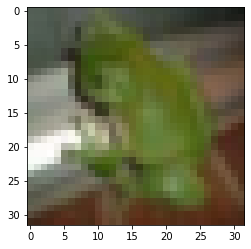

In [14]:
plt.imshow(x_test[7])
print(y_test[7])
result = model.predict_classes(x_test[7].reshape(1,32,32,3))
print(result)

In [1]:
count = 0   
for index in range(100):  # 使用测试集的100张图片进行随机三像素攻击
    result = model.predict_classes(x_test[index].reshape(1,32,32,3))
    if result != y_test[index]:  # 剔除模型分类出错的图片
        count += 1
        continue
    else:
        i = random.randint(0, 32)
        j = random.randint(0, 32)
        q = random.randint(0, 32)
        w = random.randint(0, 32)
        a = random.randint(0, 32)
        s = random.randint(0, 32)
        x_test_tmp[index,i,j] = [255,255,255]
        x_test_tmp[index,q,w] = [255,255,255]
        x_test_tmp[index,a,s] = [255,255,255]
        result = model.predict_classes(x_test_tmp[index].reshape(1,32,32,3))
        res = model.predict(x_test_tmp[index].reshape(1,32,32,3))
        if result[0] != y_test[index]:
             plt.imshow(x_test_tmp[index],cmap='gray')
             plt.show()
             print("predict:",res[0])
             print("predict:",result[0])
             print("true:",y_test[index])
             print((index,i,j,q,w,a,s))
        x_test_tmp = copy.deepcopy(x_test)
print(count)

NameError: name 'model' is not defined